In [1]:
!pip install pillow-heif

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.8 MB/s eta 0:00:00


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
!ls /content/drive/MyDrive/dataset

angry  fear  happy  sad  surprise


In [ ]:
import os
from PIL import Image
import pillow_heif
'''
pillow_heif.register_heif_opener()

BASE_DIR = "/content/drive/MyDrive/dataset"  # ← مسار Drive
classes = ["happy", "sad", "fear", "angry", "surprised"]

for cls in classes:
    cls_path = os.path.join(BASE_DIR, cls)

    if not os.path.exists(cls_path):
        print(f"Folder not found: {cls_path}")
        continue

    for fname in os.listdir(cls_path):
        if fname.lower().endswith((".heic", ".heif")):
            old_path = os.path.join(cls_path, fname)
            new_path = os.path.join(
                cls_path,
                os.path.splitext(fname)[0] + ".jpg"
            )

            try:
                img = Image.open(old_path).convert("RGB")
                img.save(new_path, "JPEG", quality=95)
                os.remove(old_path)
            except Exception as e:
                print(f" Error with {fname}: {e}")

print(" HEIC / HEIF conversion completed on Google Drive!")
'''

In [4]:
ls /content/drive/MyDrive/dataset/angry | head

IMG_5926.jpg
IMG_5930.jpg
IMG_5939.jpg
IMG_5940.jpg
IMG_5941.jpg
IMG_5942.jpg
IMG_5951.jpg
IMG_5952.jpg
IMG_5953.jpg
IMG_5954.jpg


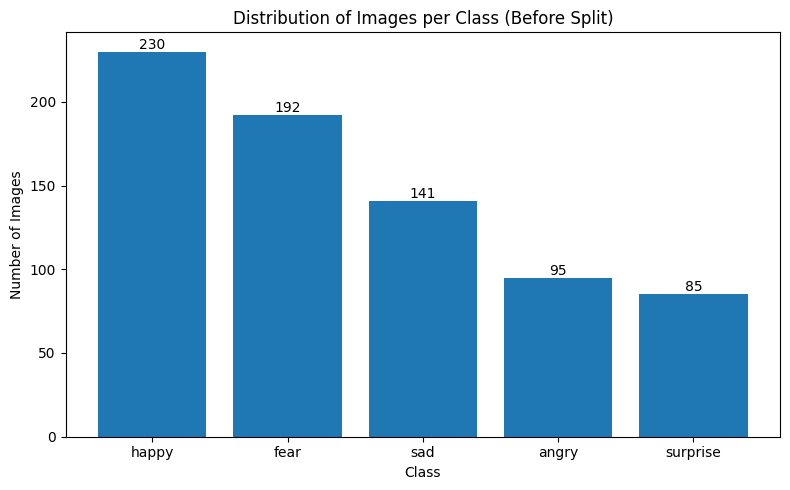

In [32]:
import os
import matplotlib.pyplot as plt

DATA_DIR = "/content/drive/MyDrive/dataset"

# استخراج أسماء الكلاسات تلقائيًا
classes = [
    d for d in os.listdir(DATA_DIR)
    if os.path.isdir(os.path.join(DATA_DIR, d))
]

IMAGE_EXTS = (".jpg", ".png", ".jpeg")

data = []

for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    num_images = len([
        f for f in os.listdir(cls_path)
        if f.lower().endswith(IMAGE_EXTS)
    ])
    data.append((cls, num_images))

# ترتيب تنازلي حسب عدد الصور
data.sort(key=lambda x: x[1], reverse=True)

classes_sorted = [item[0] for item in data]
counts_sorted  = [item[1] for item in data]

plt.figure(figsize=(8,5))
bars = plt.bar(classes_sorted, counts_sorted)

plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class (Before Split)")
plt.xticks(rotation=0)

# إظهار القيم فوق الأعمدة
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

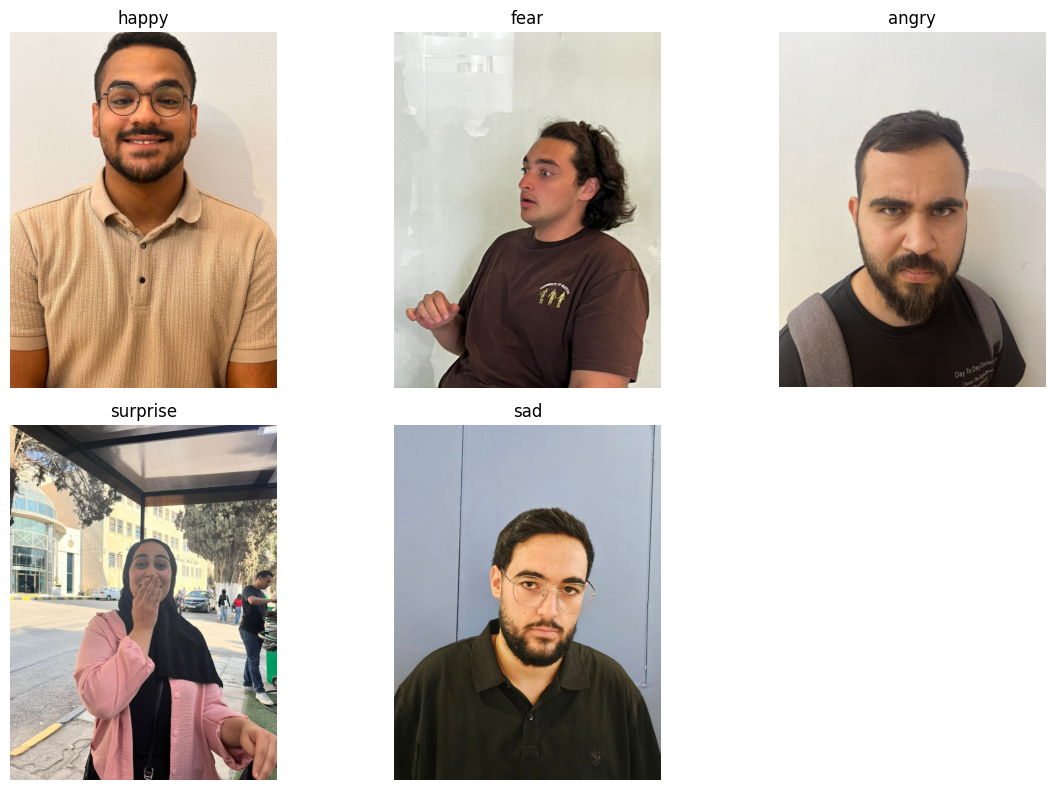

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

DATA_DIR = "/content/drive/MyDrive/dataset"
classes = os.listdir(DATA_DIR)

plt.figure(figsize=(12, 8))

i = 1
for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    # Filter to get only image files, ignoring subdirectories
    image_files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in {cls_path}, skipping.")
        continue

    img_name = random.choice(image_files)
    img_path = os.path.join(cls_path, img_name)

    img = Image.open(img_path)

    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

    i += 1

plt.tight_layout()
plt.show()

In [33]:
# حساب class weights
total_samples = sum(class_counts.values())
class_weights = {}
for cls, count in class_counts.items():
    class_weights[cls] = total_samples / (len(CLASSES) * count)

print("\nClass Weights for Imbalanced Training:")
for cls, weight in class_weights.items():
    print(f"{cls}: {weight:.3f}")


Class Weights for Imbalanced Training:
angry: 1.564
fear: 0.774
happy: 0.646
sad: 1.054
surprise: 1.748


In [35]:
import os
CLASSES = ['angry','fear','happy','sad','surprise']

print("Number of images for each class: ")
for cls in CLASSES:
    cls_path = os.path.join(DATA_DIR, cls)

    if not os.path.exists(cls_path):
        print(f"{cls}: Not exixst")
        continue


    image_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

    print(f"{cls}: {len(image_files)}  images")

Number of images for each class: 
angry: 95  images
fear: 192  images
happy: 230  images
sad: 141  images
surprise: 85  images


In [36]:
import os
import random
from PIL import Image
from collections import Counter

DATA_DIR = "/content/drive/MyDrive/dataset"
OUTPUT_DIR = "/content/drive/MyDrive/dataset_splits"
CLASSES = ['angry','fear','happy','sad','surprise']
SPLITS = (0.7, 0.2, 0.1)
TARGET_SIZE = (300, 300)

for split in ['train','val','test']:
    for cls in CLASSES:
        os.makedirs(os.path.join(OUTPUT_DIR, split, cls), exist_ok=True)

all_images = {}
class_counts = {cls: 0 for cls in CLASSES}

for cls in CLASSES:
    cls_path = os.path.join(DATA_DIR, cls)
    images = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg','.jpeg','.png'))]
    all_images[cls] = images
    class_counts[cls] = len(images)
    print(f"{cls}: {len(images)} images")

total_samples = sum(class_counts.values())
class_weights = {}
for cls, count in class_counts.items():
    class_weights[cls] = total_samples / (len(CLASSES) * count)

print("\nClass Weights for Imbalanced Training:")
for cls, weight in class_weights.items():
    print(f"{cls}: {weight:.3f}")


for cls, images in all_images.items():
    random.shuffle(images)
    n_total = len(images)
    n_train = int(n_total * SPLITS[0])
    n_val   = int(n_total * SPLITS[1])

    train_imgs = images[:n_train]
    val_imgs   = images[n_train:n_train+n_val]
    test_imgs  = images[n_train+n_val:]

    for img_list, split in zip([train_imgs, val_imgs, test_imgs], ['train','val','test']):
        for idx, img in enumerate(img_list):
            src_path = os.path.join(DATA_DIR, cls, img)
            dst_name = f"{cls}_{idx}_{split}.jpg"
            dst_path = os.path.join(OUTPUT_DIR, split, cls, dst_name)

            try:
                im = Image.open(src_path).convert("RGB")
                im = im.resize(TARGET_SIZE)
                im.save(dst_path, "JPEG", quality=95)
            except Exception as e:
                print(f"Error processing {src_path}: {e}")

print("splitting  the dataset to train ,val ,test ")
print("class_weights :", class_weights)

angry: 95 images
fear: 192 images
happy: 230 images
sad: 141 images
surprise: 85 images

Class Weights for Imbalanced Training:
angry: 1.564
fear: 0.774
happy: 0.646
sad: 1.054
surprise: 1.748
splitting  the dataset to train ,val ,test 
class_weights : {'angry': 1.5642105263157895, 'fear': 0.7739583333333333, 'happy': 0.6460869565217391, 'sad': 1.0539007092198582, 'surprise': 1.748235294117647}


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

IMG_SIZE = (300, 300)
BATCH    = 32
CLASSES  = ['angry','fear','happy','sad','surprise']
SEED     = 42

TRAIN = "/content/drive/MyDrive/dataset_splits/train"
VAL   = "/content/drive/MyDrive/dataset_splits/val"
TEST  = "/content/drive/MyDrive/dataset_splits/test"

# --- Augmentation ـ train only ---
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.85, 1.15],
    horizontal_flip=True,
    fill_mode='nearest'
)

# --- Eval: validation & test (no augmentation) ---
eval_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# --- Generators ---
train_gen = train_datagen.flow_from_directory(
    TRAIN,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical',
    shuffle=True,
    classes=CLASSES,
    seed=SEED
)

val_gen = eval_datagen.flow_from_directory(
    VAL,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical',
    shuffle=False,
    classes=CLASSES
)

test_gen = eval_datagen.flow_from_directory(
    TEST,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical',
    shuffle=False,
    classes=CLASSES
)

print("Class indices:", train_gen.class_indices)
print("Counts → Train:", train_gen.n, "Val:", val_gen.n, "Test:", test_gen.n)

Found 518 images belonging to 5 classes.
Found 148 images belonging to 5 classes.
Found 77 images belonging to 5 classes.
Class indices: {'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprise': 4}
Counts → Train: 518 Val: 148 Test: 77


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Dropout, BatchNormalization, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.applications import EfficientNetB0
import numpy as np

# --- Enhanced Model with Random Projection ---
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(300,300,3))
base_model.trainable = False

inputs = tf.keras.Input(shape=(300, 300, 3))
feat = base_model(inputs, training=False)

# الحصول على الأبعاد الحالية للميزات
# H, W: الطول والعرض (غالباً 10x10 لصورة 300x300)
# C: عدد القنوات (في EfficientNetB0 هي 1280)
H, W, C_original = feat.shape[1], feat.shape[2], feat.shape[3] # Renamed C to C_original to avoid conflict

# ==========================================
# جزئية الـ RANDOM PROJECTION (إضافة)
# ==========================================
# نريد تقليص عدد القنوات (C) من 1280 إلى بعد أصغر (مثلاً 512) لتقليل الـ Complexity
TARGET_DIM = 512

# توليد مصفوفة عشوائية ثابتة (ثابتة رياضياً لا تتدرب)
# نستخدم نفس الـ Seed لضمان الثبات
R_matrix = (np.random.normal(0, 1, (C_original, TARGET_DIM)) / np.sqrt(TARGET_DIM)).astype('float32')
R_tensor = tf.constant(R_matrix)

# تطبيق الإسقاط العشوائي على الميزات قبل تحويلها لـ Tokens
# نقوم بضرب المصفوفات على مستوى القنوات
feat_projected = Lambda(lambda v: tf.matmul(v, R_tensor), output_shape=(H, W, TARGET_DIM), name="random_projection_layer")(feat)
C = TARGET_DIM # تحديث قيمة C لاستخدامها في الطبقات التالية
# ==========================================

# تحويل الخريطة المقلصة (Projected Feature Map) إلى Tokens
tokens = tf.keras.layers.Reshape((H * W, C))(feat_projected)

# Learnable Query
query_layer = Dense(C, use_bias=False,
                    kernel_initializer='glorot_uniform',
                    name="learned_query")
query_token = tf.keras.layers.GlobalAveragePooling1D(keepdims=True)(tokens)
q = query_layer(query_token)

# Multi-Head Attention (تعمل الآن على 512 قناة بدل 1280 بفضل الـ Random Projection)
attn = tf.keras.layers.MultiHeadAttention(
    num_heads=8,
    key_dim=C // 8,
    dropout=0.15
)(
    query=q,
    key=tokens,
    value=tokens
)

# Add residual connection
x = tf.keras.layers.Add()([q, attn])
x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)

# Additional transformer-like feed-forward network
ff = Dense(C * 2, activation='gelu')(x)
ff = Dropout(0.1)(ff)
ff = Dense(C)(ff)
x = tf.keras.layers.Add()([x, ff])
x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)

x = tf.keras.layers.Flatten()(x)
x = Dropout(0.3)(x)

# [بقية طبقات الـ Classification Head كما هي في كودك الأصلي...]
x = BatchNormalization(momentum=0.9)(x)
x = Dense(512, activation='gelu', kernel_regularizer=regularizers.l2(0.0005), kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

x = BatchNormalization(momentum=0.9)(x)
x = Dense(256, activation='gelu', kernel_regularizer=regularizers.l2(0.0005), kernel_initializer='he_normal')(x)
x = Dropout(0.4)(x)

x = BatchNormalization(momentum=0.9)(x)
x = Dense(128, activation='gelu', kernel_regularizer=regularizers.l2(0.0005), kernel_initializer='he_normal')(x)
x = Dropout(0.3)(x)

output = Dense(len(CLASSES), activation='softmax', kernel_initializer='glorot_uniform')(x)

model = Model(inputs=inputs, outputs=output)

# Recompile and Train كما في كودك الأصلي تماماً...
model.compile(optimizer=Adam(learning_rate=1e-3, clipnorm=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3)])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 10, 10,    │  4,049,571 │ input_layer_8[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_projection_… │ (None, 10, 10,    │          0 │ efficientnetb0[0… │
│ (Lambda)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 100, 512)  │          0 │ random_projectio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1, 512)    │          0 │ reshape_1[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ learned_query       │ (None, 1, 512)    │    262,144 │ global_average_p… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 512)    │  1,050,624 │ reshape_1[0][0],  │
│ (MultiHeadAttentio… │                   │            │ learned_query[0]… │
│                     │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 1, 512)    │          0 │ learned_query[0]… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 512)    │      1,024 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1, 1024)   │    525,312 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 1, 1024)   │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1, 512)    │    524,800 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 1, 512)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 512)    │      1,024 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 512)       │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 512)       │          0 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dropout_8[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 512)       │    262,656 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 512)       │          0 │ dense_9[0][0]   

 Total params: 6,847,144 (26.12 MB)

 Trainable params: 2,795,013 (10.66 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [42]:
# --- 1. Callbacks ---
early_stop = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, min_lr=1e-7, mode='min', verbose=1)
checkpoint = ModelCheckpoint('best_model_rp.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

callbacks = [early_stop, reduce_lr, checkpoint]

print("Phase 1: Training with Random Projection & Attention (Frozen Base)")
history_frozen = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15, # يمكنك البدء بـ 10-15
    class_weight=class_weights, # تأكد من تعريفها سابقاً
    callbacks=callbacks
)

base_model.trainable = True
# تجميد أول 80 طبقة وتحرير الباقي
for layer in base_model.layers[:-80]:
    layer.trainable = False

# إعادة التجميع بـ Learning Rate منخفض جداً للحفاظ على الاستقرار
model.compile(optimizer=Adam(learning_rate=5e-5, clipnorm=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3)])

print("Phase 2: Fine-tuning the Top Layers of EfficientNet")
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    class_weight=class_weights,
    callbacks=callbacks
)

Phase 1: Training with Random Projection & Attention (Frozen Base)
Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2338 - loss: 3.0191 - top_k_categorical_accuracy: 0.6768

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.45270, saving model to best_model_rp.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 157s 8s/step - accuracy: 0.2365 - loss: 3.0098 - top_k_categorical_accuracy: 0.6783 - val_accuracy: 0.4527 - val_loss: 2.2722 - val_top_k_categorical_accuracy: 0.7973 - learning_rate: 0.0010
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3590 - loss: 2.5900 - top_k_categorical_accuracy: 0.7726
Epoch 2: val_accuracy improved from 0.45270 to 0.54730, saving model to best_model_rp.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 122s 7s/step - accuracy: 0.3611 - loss: 2.5858 - top_k_categorical_accuracy: 0.7740 - val_accuracy: 0.5473 - val_loss: 2.0261 - val_top_k_categorical_accuracy: 0.9122 - learning_rate: 0.0010
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4164 - loss: 2.4218 - top_k_categorical_accuracy: 0.8249
Epoch 3: val_accuracy improved from 0.54730 to 0.62162, saving model to best_model_rp.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 134s 8s/step - accuracy

In [43]:
print("\nFinal Model Evaluation on Test Set:")
test_results = model.evaluate(test_gen)
print(f"Test Accuracy: {test_results[1]:.4f}")

# حفظ الموديل النهائي
MODEL_SAVE_PATH = "/content/drive/MyDrive/efficientnet_rp_final.h5"
model.save(MODEL_SAVE_PATH)
print(f"Model saved successfully at: {MODEL_SAVE_PATH}")


Final Model Evaluation on Test Set:
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9428 - loss: 1.0436 - top_k_categorical_accuracy: 1.0000


Test Accuracy: 0.9481
Model saved successfully at: /content/drive/MyDrive/efficientnet_rp_final.h5


In [44]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, roc_auc_score, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import itertools

# --- Predictions ----
test_gen.reset()
preds = model.predict(test_gen, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
y_pred_proba = preds

# --- Overall Metrics ---
accuracy = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print("Model Perfornmance")
print("=" * 50)
print(f"Accuracy:        {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"F1-Score (Macro):  {f1_macro:.4f}")
print(f"F1-Score (Weighted): {f1_weighted:.4f}")

# --- ROC-AUC ---
y_true_bin = label_binarize(y_true, classes=range(len(CLASSES)))
roc_auc_macro = roc_auc_score(y_true_bin, y_pred_proba, multi_class='ovr', average='macro')
print(f"ROC-AUC (Macro):  {roc_auc_macro:.4f}")

print("\n\n\n")

# --- Classification Report ---
print("\nCLASSIFICATION REPORT")
print(classification_report(y_true, y_pred, target_names=CLASSES))

3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step
Model Perfornmance
Accuracy:        0.9481 (94.81%)
F1-Score (Macro):  0.9448
F1-Score (Weighted): 0.9478
ROC-AUC (Macro):  0.9960





CLASSIFICATION REPORT
              precision    recall  f1-score   support

       angry       1.00      0.90      0.95        10
        fear       1.00      0.95      0.97        20
       happy       0.92      1.00      0.96        23
         sad       0.93      0.87      0.90        15
    surprise       0.90      1.00      0.95         9

    accuracy                           0.95        77
   macro avg       0.95      0.94      0.94        77
weighted avg       0.95      0.95      0.95        77



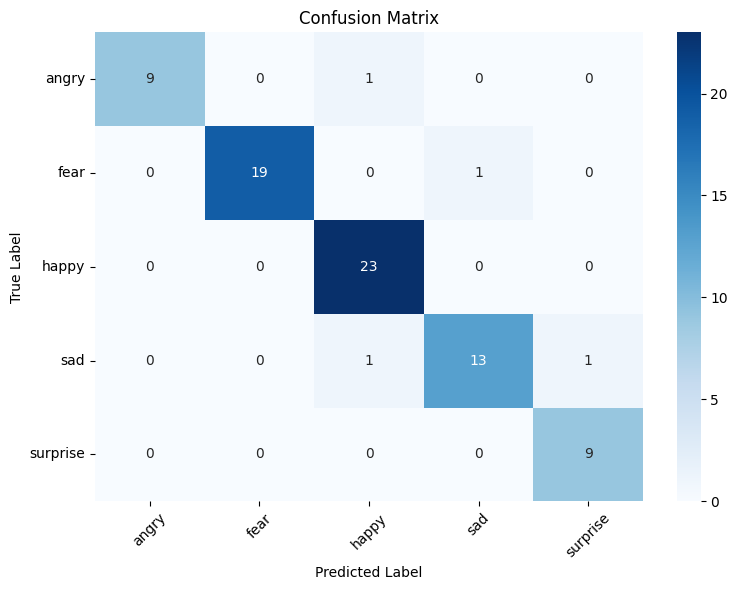

In [45]:
# ---Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm, annot=True, fmt="d",cmap='Blues',
    xticklabels=CLASSES,
    yticklabels=CLASSES
)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


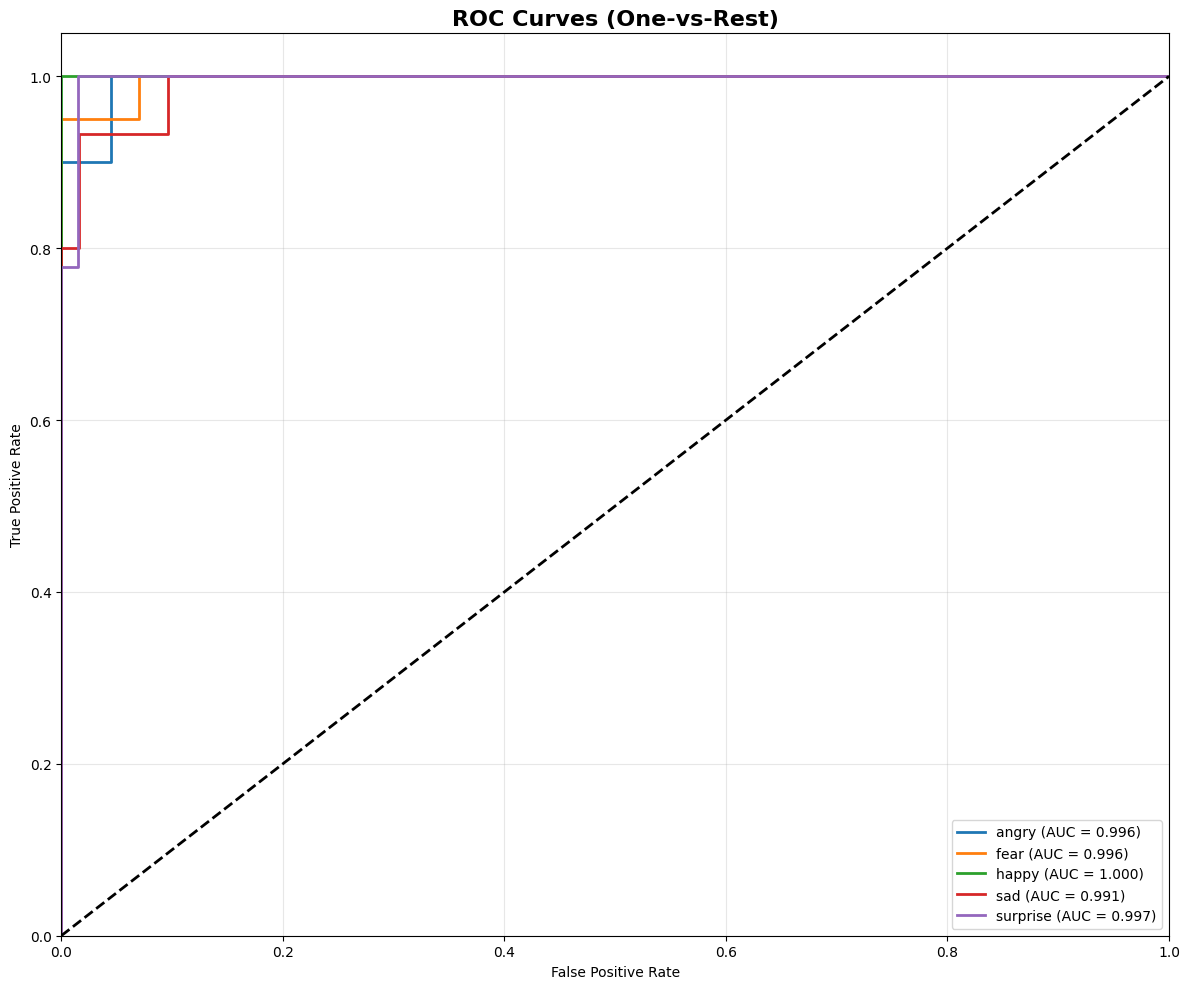

In [46]:
# ---ROC Curves ---
plt.figure(figsize=(12, 10))
for i, cls in enumerate(CLASSES):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,
             label=f'{cls} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# class_names = list(test_gen.class_indices.keys())

# plt.figure(figsize=(12, 10))
# for i, cls in enumerate(class_names):
#     fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
#     roc_auc = auc(fpr, tpr)

#     plt.plot(fpr, tpr, linewidth=2,
#              label=f'{cls} (AUC = {roc_auc:.3f})')

# plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves (One-vs-Rest)')
# plt.legend(loc="lower right")
# plt.grid(alpha=0.3)
# plt.show()


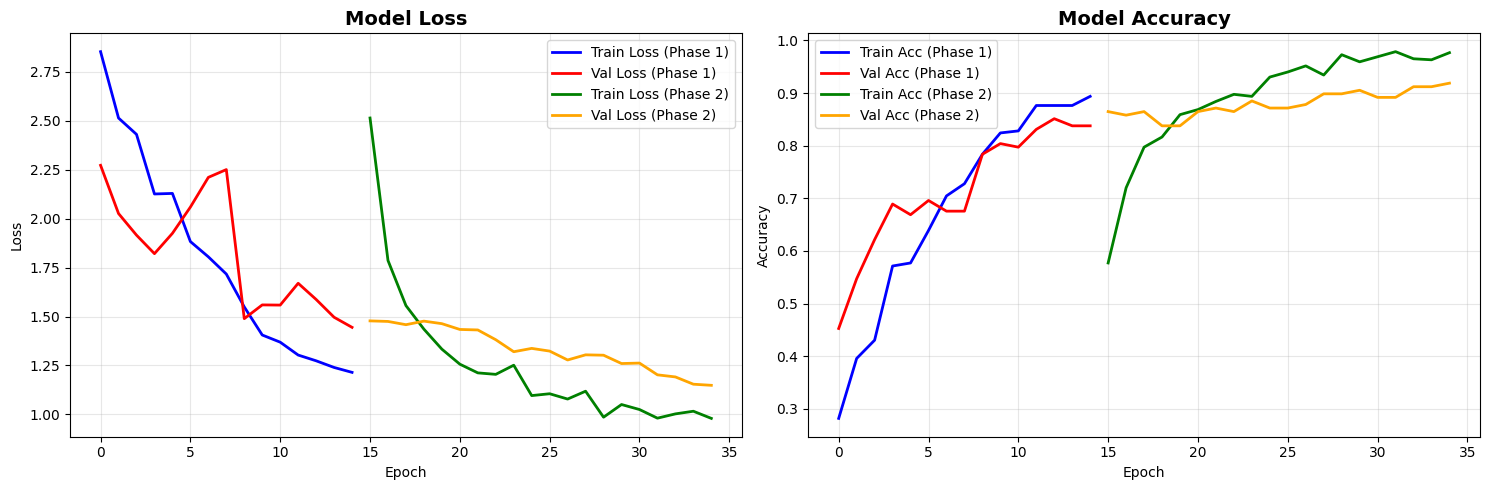

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# --- Loss Curve ---
ax1.plot(history_frozen.history['loss'], label='Train Loss (Phase 1)', color='blue', linewidth=2)
ax1.plot(history_frozen.history['val_loss'], label='Val Loss (Phase 1)', color='red', linewidth=2)

if 'history_finetune' in globals():
    epochs1 = len(history_frozen.history['loss'])
    ax1.plot(range(epochs1, epochs1+len(history_finetune.history['loss'])),
            history_finetune.history['loss'], label='Train Loss (Phase 2)', color='green', linewidth=2)
    ax1.plot(range(epochs1, epochs1+len(history_finetune.history['val_loss'])),
            history_finetune.history['val_loss'], label='Val Loss (Phase 2)', color='orange', linewidth=2)

ax1.set_title('Model Loss', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# ---Accuracy Curve ---
ax2.plot(history_frozen.history['accuracy'], label='Train Acc (Phase 1)', color='blue', linewidth=2)
ax2.plot(history_frozen.history['val_accuracy'], label='Val Acc (Phase 1)', color='red', linewidth=2)

if 'history_finetune' in globals():
    epochs1 = len(history_frozen.history['accuracy'])
    ax2.plot(range(epochs1, epochs1+len(history_finetune.history['accuracy'])),
            history_finetune.history['accuracy'], label='Train Acc (Phase 2)', color='green', linewidth=2)
    ax2.plot(range(epochs1, epochs1+len(history_finetune.history['val_accuracy'])),
            history_finetune.history['val_accuracy'], label='Val Acc (Phase 2)', color='orange', linewidth=2)

ax2.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()